<a href="https://colab.research.google.com/github/prgmr99/deep_learning-pytorch-/blob/main/LR_multivariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **다중 선형 회귀(Multivariable Linear Regression)**

In [2]:
# 필요한 도구들을 임포트하고 랜덤 시드 고정
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [3]:
# 훈련 데이터 선언
# H(x) = w1*x1 + w2*x2 + w3*x3 + b
# 단순 선형 회귀와 다르게 x의 개수가 3개가 주어진다.
x1_train=torch.FloatTensor([[73],[89],[96],[73]])
x2_train=torch.FloatTensor([[80],[91],[98],[66]])
x3_train=torch.FloatTensor([[75],[90],[100],[70]])
y_train=torch.FloatTensor([[152],[185],[196],[142]])

In [4]:
# 가중치 w와 편향 b를 선언한다. 가중치 w도 3개 선언해주어야 한다.
w1=torch.zeros(1,requires_grad=True)
w2=torch.zeros(1,requires_grad=True)
w3=torch.zeros(1,requires_grad=True)
b=torch.zeros(1,requires_grad=True)

In [5]:
# 가설, 비용 함수, 옵티마이저를 선언한 후에 경사 하강법을 1,000회 반복한다.
optimizer=optim.SGD([w1,w2,w3,b],lr=1e-5)

nb_epochs=1000
for epoch in range(nb_epochs+1):
  # H(x) 계산
  hypothesis=x1_train*w1+x2_train*w2+x3_train*w3+b
  # cost 계산
  cost=torch.mean((hypothesis-y_train)**2)
  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
        epoch,nb_epochs,w1.item(),w2.item(),w3.item(),b.item(),cost.item()
    ))

Epoch    0/1000 w1: 0.284 w2: 0.288 w3: 0.288 b: 0.003 Cost: 28977.250000
Epoch  100/1000 w1: 0.673 w2: 0.673 w3: 0.676 b: 0.008 Cost: 4.468198
Epoch  200/1000 w1: 0.678 w2: 0.670 w3: 0.675 b: 0.008 Cost: 4.426130
Epoch  300/1000 w1: 0.683 w2: 0.666 w3: 0.674 b: 0.008 Cost: 4.385874
Epoch  400/1000 w1: 0.688 w2: 0.662 w3: 0.673 b: 0.008 Cost: 4.347408
Epoch  500/1000 w1: 0.692 w2: 0.659 w3: 0.672 b: 0.008 Cost: 4.310602
Epoch  600/1000 w1: 0.697 w2: 0.655 w3: 0.670 b: 0.008 Cost: 4.275374
Epoch  700/1000 w1: 0.702 w2: 0.652 w3: 0.669 b: 0.009 Cost: 4.241687
Epoch  800/1000 w1: 0.706 w2: 0.649 w3: 0.668 b: 0.009 Cost: 4.209398
Epoch  900/1000 w1: 0.711 w2: 0.645 w3: 0.667 b: 0.009 Cost: 4.178495
Epoch 1000/1000 w1: 0.715 w2: 0.642 w3: 0.666 b: 0.009 Cost: 4.148907


# **벡터와 행렬 연산으로 바꾸기**

위의 코드 개선 가능. x의 개수가 3개였기 때문에 일일이 선언할 수 있었다.

하지만, x의 개수가 1000개라면 x_train1 ~ x_train1000 모두 선언하고 w1 ~ w1000 모두 선언해야한다. 총 2000번의 선언이다. 따라서 비효율적이다.

이를 해결하기 위해 행렬 곱셈 연산(또는 벡터의 내적)을 사용한다.

행렬의 곱셈 과정에서 이루어지는 벡터 연산을 벡터의 내적(Dot Product)라고 한다.

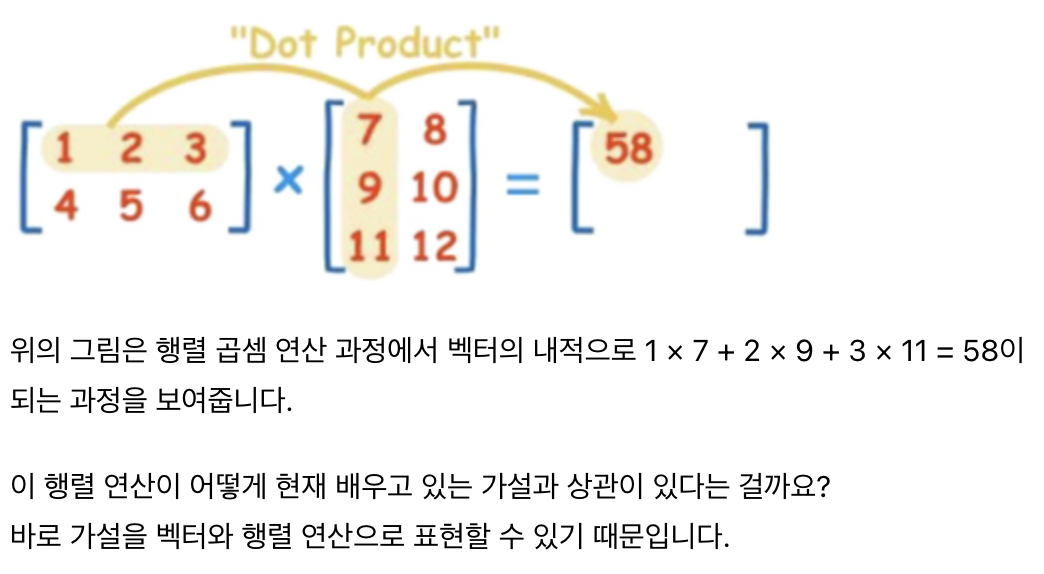


### **1. 벡터 연산으로 이해하기**

H(x)=w1*x1+w2*x2+w3*x3

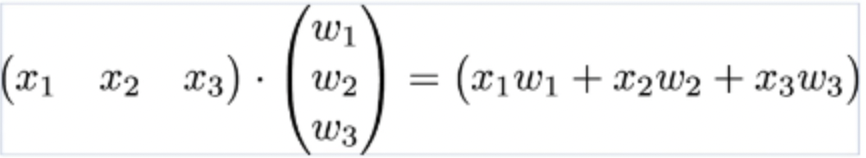

두 벡터를 각각 X와 W로 표현한다면, 가설은 다음과 같다.

H(X)=X*W

x의 개수가 3개였음에도 이제는 X와 W라는 두 개의 변수로 표현된 것을 볼 수 있다.

### **2. 행렬 연산으로 이해하기**

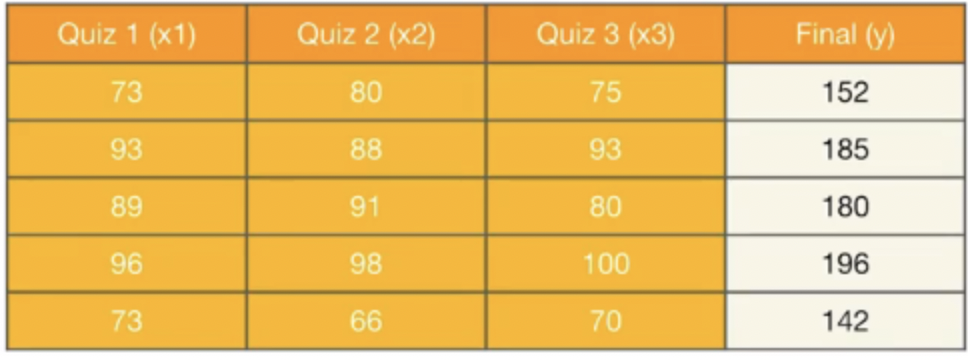

전체 훈련 데이터의 개수를 셀 수 있는 1개의 단위를 샘플이라고 하면 현재 샘플의 수는 총 5개이다.

In [7]:
# 4. 행렬 연산을 고려하여 파이토치로 구현하기

x_train=torch.FloatTensor([[73,80,75],
                           [93,88,93],
                           [89,91,80],
                           [96,98,100],
                           [73,66,70]])

y_train=torch.FloatTensor([[152],[185],[180],[196],[142]])

# x_train을 3개나 구현했던 것과 다르게 이번에는 x_train 하나에 모든 샘플을 전부 선언
print(x_train.shape)
print(y_train.shape)
# (5x3) 행렬 X을 선언한 것

torch.Size([5, 3])
torch.Size([5, 1])


In [9]:
# 가중치와 편향 선언
W=torch.zeros((3,1), requires_grad=True)
b=torch.zeros(1,requires_grad=True)

# 주목할 점: 가중치 W의 크기가 (3x1) 벡터라는 점. 
# 행렬의 곱셈이 성립되려면 곱셈의 좌측에 있는 행렬의 열의 크기 = 우측에 있는 행렬의 행의 크기
# 현재 x_train = (5x3), W 벡터의 크기 = (3x1) 행렬 곱 가능.


In [12]:
# 행렬곱으로 가설을 선언하면 아래와 같다.
hypothesis=x_train.matmul(W)+b

# 앞서 x_train과 w의 곱셈이 이루어지는 각 항을 전부 기재하여 가설을 선언했던 것과 대비됨.
# 이 경우, 사용자가 독립 변수 x의 수를 후에 추가적으로 늘리거나 줄이더라도 위의 가설 선언 코드를 수정할 필요x


In [14]:
# 이제 해야할 일은 비용 함수와 옵티마이저를 정의하고, 정해진 에포크만큼 훈련 진행.
x_train=torch.FloatTensor([[73, 80, 75],
                          [93,  88,  93], 
                          [89,  91,  80], 
                          [96,  98,  100],   
                          [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

# 모델 초기화
W=torch.zeros((3,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

#optimizer 설정
optimizer=optim.SGD([W,b],lr=1e-5) # SGD는 경사 하강법의 일종

nb_epochs=20
for epoch in range(nb_epochs+1):
  # H(x) 계산
  # 편향 b는 브로드 캐스팅(broadcasting)되어 각 샘플에 더해진다.
  hypothesis=x_train.matmul(W)+b

  # cost 계산
  cost=torch.mean((hypothesis-y_train)**2)

  # cost로 H(x) 개선
  optimizer.zero_grad()  
  # 미분을 통해 얻은 기울기를 0으로 초기화한다. 
  # 기울기를 초기화해야만 새로운 가중치 편향에 대해서 새로운 기울기를 구할 수 있다. 
  
  cost.backward()
  # 가중치 W와 편향 b에 대한 기울기 계산

  optimizer.step()
  # 인수로 들어갔던 W, b에서 리턴되는 변수들의 기울기에 학습률(lr)을 곱하여 빼줌으로써 업데이트한다.

  print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
      epoch,nb_epochs,hypothesis.squeeze().detach(),cost.item()))
  
  # hypothesis.squeeze()
  # squeeze: 1인 차원을 제거한다. 스퀴즈를 하지않으면 행렬곱 이후, 위에 있는 y_train과 같은 형태가 된다.
  # 스퀴즈를 해주므로써 (5x1) -> (5,)가 되었다.

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7862,  95.8280]) Cost: 3069.590088
Epoch    3/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670288
Epoch    4/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.481873
Epoch    5/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/20 hypothesis: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687496
Epoch    7/20 hypothesis: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    8/20 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365656
Epoch    9/20 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) Cost: 7.071114
Epoch   10/20 hyp